# UFRJ / COPPE / Programa de Engenharia Eletrica
# CPE-723 – Otimizacao Natural (Parte II - Simulated Annealing)
# Lista de Exercicios #4
# Carlos Eduardo Covas Costa

In [51]:
import random
from random import randint
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools

# 1

In [374]:
def decode(genotipos_array,comprimento_string):
    fenotipos=[]
    row,column = genotipos_array.shape
    for r in range(row):
        fenotipo = int(''.join(map(str, genotipos_array[r,1:])), 2)
        if inicializacao[r,0]:
            fenotipo *= -1
        fenotipo = 2*float(fenotipo)/float(2**(comprimento_string-1))
        fenotipos.append(fenotipo) 
    return fenotipos
def fitness(fenotipos):
    aptidoes=[]
    for i in range(len(fenotipos)):
        x = fenotipos[i]
        aptidao=x**2 - 0.3*math.cos(10*math.pi*x)
        aptidoes.append(aptidao)
    return aptidoes
def prob_linear(rank_position,s,populacao):
    p = float(2-s)/float(populacao) + float(2*rank_position*(s-1))/float(populacao*(populacao-1))
    return p 
def mutation(descendentes):
    row,column = descendentes.shape
    prob_mut = float(1/column) ###mutation bit-flip with probability pm 1/L
    for r in range(row):
        for c in range(column):
            r = np.random.random()
            if(r < prob_mut):
                if(descendentes[r][c] == 0):
                    descendentes[r][c] = 1
                else:
                    descendentes[r][c] = 0
    return descendentes

In [435]:
###inicializacao
geracoes = 5
populacao = 50
comprimento_string = 16
inicializacao = np.random.randint(0,2,size=(populacao, comprimento_string))
genotipos = inicializacao
#print(genotipos)
mate_size = populacao ###geracional
descendente_size = populacao ###geracional
#descendentes = np.zeros(shape=(descendente_size,comprimento_string))
descendentes = np.random.randint(0,1,size=(descendente_size,comprimento_string))
#mate_pool = np.zeros(shape=(mate_size,comprimento_string))
mate_pool = np.random.randint(0,1,size=(mate_size,comprimento_string))
#print(descendentes)
#mate_pool = np.zeros(size=(mate_size,1))
###offset = 4 # para acharmos o minimo ao maximizarmos a funcao.
prob_mate = 1
###metade = float(descendente_size)/2
#for i in range(int(metade)):
#print(genotipos)
###avaliacao
#print(decode(genotipos,comprimento_string))
funcao =fitness(decode(genotipos,comprimento_string))
#print(funcao)

for geracao in range(geracoes):    
    a=ss.rankdata(funcao)###ranking
    b = a.tolist()
    array_offset = np.empty(populacao)
    array_offset.fill(populacao)
    rank = array_offset-b
    #print(rank)
    ###select parents
    p_lin = []
    for i in range(populacao):
        p_lin.append(prob_linear(rank[i],2,populacao))
    #print(p_lin)
    cumulativo = np.cumsum(p_lin)
    #print(cumulativo)
    ###testar ate achar os parentes
    for i in range(mate_size):
        r = np.random.random()
        j = 0
        while(cumulativo[j]<r):###roulette wheel
            j = j+1
        #for j in range(len(cumulativo)):
            #if(r < cumulativo[j]):
        #print(j)
        for k in range(comprimento_string):
            int_gene = genotipos[j][k]

            mate_pool[i][k] = int(int_gene)
    for i in range(0,descendente_size,2):
        #print(i)
        r = np.random.random()
        #print(r)
        if(r < prob_mate):###recombinação
            #def crossover(mate(n),mate(n+1):
            sep_index = np.random.randint(comprimento_string) ###recombination one-point crossover with probability pc = 0.7
            #print(sep_index)
            for c1 in range(sep_index):
                descendentes[i][c1] = mate_pool[i][c1]
                descendentes[i+1][c1] = mate_pool[i+1][c1]
                #descendentes[i+metade][c1] = mate_pool[i+metade][c1]
            for c2 in range(sep_index,comprimento_string,1):
                descendentes[i][c2] = mate_pool[i+1][c2]
                descendentes[i+1][c2] = mate_pool[i][c2]
        else:
            for j in range(comprimento_string):
                descendentes[i][j] = mate_pool[i][j]
                descendentes[i+1][j] = mate_pool[i+1][j]
    ###strict generational (no elitism)            
    genotipos = mutation(descendentes) ###mutation bit-flip with probability pm = 1/L
        #print(descendentes)
        #genotipos = descendentes
    funcao =fitness(decode(genotipos,comprimento_string))
    print("Rodada: "+str(geracao+1))
    print("Min: "+str(min(funcao))+", Mean: "+str(np.mean(funcao))+", Max: "+str(max(funcao)))
    print(funcao)
    #print(np.mean(funcao))
    #print(min(funcao))


Rodada: 1
Min: -0.17515425411629135, Mean: 0.819961882683, Max: 3.1603073449379604
[3.1367493088222074, -0.11663030476384856, 0.05754633134769491, 0.44228902734244113, 1.4829891395192678, -0.01701489477656426, 1.113343001956073, 1.0080389353018755, 0.15865174110134883, -0.13911637745975114, 0.7480611571913549, 2.5105207860318344, 0.2767627783408667, -0.17515425411629135, 1.4716453340407916, 3.084526283022662, 1.0589800197208767, 0.20262603503340768, 0.8918512032312689, 0.7249114109212133, 0.3202352756416842, 0.0632669831846829, 1.480150428074699, 1.482480170245574, 0.6924719034292678, 0.6924719034292678, -0.1532958835501592, 0.42127561081044496, -0.05706858687777577, 0.6498922586632564, 0.42440299437989054, 3.1603073449379604, 0.7487510835169136, 0.7487510835169136, -0.006915333980669481, 0.46556295488174537, 0.842538990311086, 1.9243767472042221, 0.42127561081044496, 2.3074434364764063, 0.3202352756416842, 0.27242406910443684, 2.008626308050297, 0.5254030791030688, 0.15428408031964147

/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Para resolução do problema proposto foi utilizada uma população igual a 50, representação binária com 16 bits, inicialização aleatória,  seleção feita por geração, sem elitismo. Foi utilizado modelo de ranking, para seleção de pais, com probabilidade de seleção com decaimento linear.A amostragem foi feita através do algoritmo Roulette wheel. Para recombinação foi utilizado o método de one-point crossover, com probabilidade de crossover = 1 e a mutação foi feita com probabilidade 1/16 de cada bit ser invertido. Em 5 gerações foi possível a aproximação do mínimo global (-0.3), obtendo-se o valor de -0.2982. Tal valor foi alcançado como mínimo da população a partir da terceira geração, tendo-se obtido, após a primeira geração, o valor de (-0.17), aproximadamente. A variação da média da população caiu de 0.81, após a primeira geração, para -0.15, após a quinta, e, portanto, empiricamente, a população se direcionou, em média, ao mínimo global ao passar das gerações.

## 2

In [418]:
def decode_onemax(string):
    fenotipos=[]
    row,column = string.shape
    for r in range(row):
        total = 0
        for c in range(column):
            total = total + string[r][c]
        fenotipos.append(total)
    return fenotipos  
def fps(fenotipos):
    fitness_proportional = []
    for i in range(len(fenotipos)):
        fitness_proportional.append(float(fenotipos[i])/float(sum(fenotipos)))
    return fitness_proportional

In [450]:
###inicializacao
geracoes = 100 ###100 generation or optimum value
populacao = 100 ###population size = 100
comprimento_string = 25 ###representation L=25
inicializacao = np.random.randint(0,2,size=(populacao, comprimento_string)) ###initialisation:random
genotipos = inicializacao ###strict generational (no elitism)
mate_size = populacao ###geracional
descendente_size = populacao ###geracional
descendentes = np.random.randint(0,1,size=(descendente_size,comprimento_string))
mate_pool = np.random.randint(0,1,size=(mate_size,comprimento_string))
prob_mate = 0.7
###avaliacao
funcao = decode_onemax(genotipos)
contador_geracoes = 0
best = []
worst = []
mean = []
time = []
while(contador_geracoes < geracoes and max(funcao) != 25):
#for i in range(geracoes):
    #print(contador_geracoes)
    fitness_propostional = fps(decode_onemax(genotipos)) ###parent selection
    cumulativo = np.cumsum(fitness_propostional)
    ###testar ate achar os parentes
    for i in range(mate_size):###roulette wheel
        r = np.random.random()
        j = 0
        while(cumulativo[j]<r):
            j = j+1
        for k in range(comprimento_string):
            int_gene = genotipos[j][k]
            mate_pool[i][k] = int(int_gene)
    for i in range(0,descendente_size,2):
        r = np.random.random()
        if(r < prob_mate): ###recombination one-point crossover with probability pc = 0.7
            sep_index = np.random.randint(comprimento_string)
            for c1 in range(sep_index):
                descendentes[i][c1] = mate_pool[i][c1]
                descendentes[i+1][c1] = mate_pool[i+1][c1]
            for c2 in range(sep_index,comprimento_string,1):
                descendentes[i][c2] = mate_pool[i+1][c2]
                descendentes[i+1][c2] = mate_pool[i][c2]
        else:
            for j in range(comprimento_string):
                descendentes[i][j] = mate_pool[i][j]
                descendentes[i+1][j] = mate_pool[i+1][j]
    ###strict generational (no elitism)            
    genotipos = mutation(descendentes) ###mutation bit-flip with probability pm = 1/L
    funcao = decode_onemax(genotipos)
    #print(max(funcao))
    best.append(max(funcao))
    worst.append(min(funcao))
    mean.append(np.mean(funcao))
    time.append(contador_geracoes)
    contador_geracoes = contador_geracoes + 1
    
#plt.plot(time,best)
#plt.plot(time,worst)
#plt.plot(time,mean)
#plt.show()
        

/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


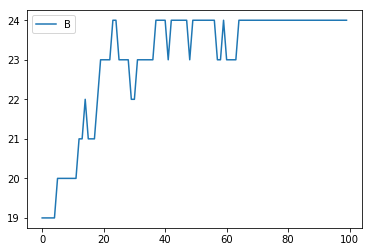

In [456]:
plt.plot(time,best)
plt.legend("Best")
#plt.plot(time,worst)
#plt.plot(time,mean)
plt.show()

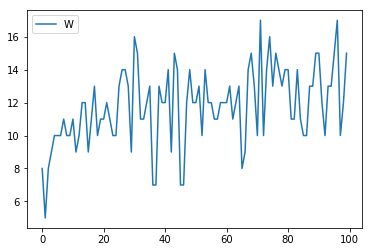

In [457]:
plt.plot(time,worst)
plt.legend("Worst")
plt.show()

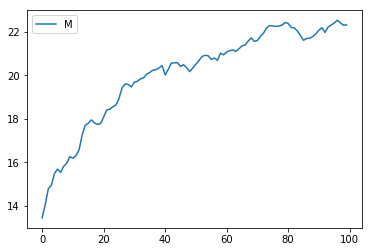

In [458]:
plt.plot(time,mean)
plt.legend("Mean")
plt.show()

In [467]:
time = []
for i in range(10):
    ###inicializacao
    geracoes = 100 ###100 generation or optimum value
    populacao = 100 ###population size = 100
    comprimento_string = 25 ###representation L=25
    inicializacao = np.random.randint(0,2,size=(populacao, comprimento_string)) ###initialisation:random
    genotipos = inicializacao ###strict generational (no elitism)
    mate_size = populacao ###geracional
    descendente_size = populacao ###geracional
    descendentes = np.random.randint(0,1,size=(descendente_size,comprimento_string))
    mate_pool = np.random.randint(0,1,size=(mate_size,comprimento_string))
    prob_mate = 0.7
    ###avaliacao
    funcao = decode_onemax(genotipos)
    contador_geracoes = 0
    while(contador_geracoes < geracoes and max(funcao) != 25):
    #for i in range(geracoes):
        #print(contador_geracoes)
        fitness_propostional = fps(decode_onemax(genotipos)) ###parent selection
        cumulativo = np.cumsum(fitness_propostional)
        ###testar ate achar os parentes
        for i in range(mate_size):###roulette wheel
            r = np.random.random()
            j = 0
            while(cumulativo[j]<r):
                j = j+1
            for k in range(comprimento_string):
                int_gene = genotipos[j][k]
                mate_pool[i][k] = int(int_gene)
        for i in range(0,descendente_size,2):
            r = np.random.random()
            if(r < prob_mate): ###recombination one-point crossover with probability pc = 0.7
                sep_index = np.random.randint(comprimento_string)
                for c1 in range(sep_index):
                    descendentes[i][c1] = mate_pool[i][c1]
                    descendentes[i+1][c1] = mate_pool[i+1][c1]
                for c2 in range(sep_index,comprimento_string,1):
                    descendentes[i][c2] = mate_pool[i+1][c2]
                    descendentes[i+1][c2] = mate_pool[i][c2]
            else:
                for j in range(comprimento_string):
                    descendentes[i][j] = mate_pool[i][j]
                    descendentes[i+1][j] = mate_pool[i+1][j]
        ###strict generational (no elitism)            
        genotipos = mutation(descendentes) ###mutation bit-flip with probability pm = 1/L
        funcao = decode_onemax(genotipos)
        contador_geracoes = contador_geracoes + 1
    print(contador_geracoes)
    time.append(contador_geracoes)

/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/carloseduardocovascosta/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


38
27
61
39
100
32
27
51
39
61


In [468]:
time

[38, 27, 61, 39, 100, 32, 27, 51, 39, 61]

In [470]:
print("Mean: "+str(np.mean(time))+" Standard Deviation: "+str(np.std(time)))

Mean: 47.5 Standard Deviation: 21.0914674691


# 3

In [2]:
def ackley(x):
    j = []
    row,column = x.shape
    n = column
    for r in range(row):
        somatorio1 = 0
        somatorio2 = 0
        for c in range(column):
            somatorio1 += x[r][c]**2
            somatorio2 += math.cos(2*math.pi*x[r][c])
        jr = -20*math.exp(-0.2*math.sqrt(somatorio1/n)) - math.exp(somatorio2/n) + 20 + math.exp(1)
        j.append(jr)
    return j

In [43]:
def mutation(x,sigma,epsilon):
    row,column = x.shape
    n = column
    tau_linha = float(1/math.sqrt(2*n))
    tau = float(1/math.sqrt(2*math.sqrt(n)))    
    x_linha = np.random.uniform(0,1,size=(row,column))    
    sigma_linha = np.random.uniform(0,1,size=(row,column))
    for r in range(row):
        normal = np.random.normal(0,1)
        for c in range(column):
            normal_i = np.random.normal(0,1)
            sigma_linha[r][c] = sigma[r][c]*math.exp((tau_linha*normal+tau*normal_i))
            if(sigma_linha[r][c] < epsilon):
                sigma_linha[r][c] = epsilon
            x_linha[r][c] = x[r][c] + sigma_linha[r][c]*normal_i
            if(x_linha[r][c] > 30):
                x_linha[r][c] = 30
            elif(x_linha[r][c] < -30):
                x_linha[r][c] = -30
    return x_linha,sigma_linha

In [44]:
def sigma_update_rule(ps,sigma,c): ###paper antigo, não será utilizado neste exerício
    if(ps > 0.2):
        sig = float(sig/c)
    elif(ps< 0.2):
        sig = sig*c
    else:
        sig = sig
    return sig
    

In [45]:
def initialise(n,populacao):
    x = np.random.uniform(0,1,size=(populacao,n))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(-30,30)
    return x

In [46]:
def initialise_sigma(nsigma,populacao):
    x = np.random.uniform(0,1,size=(populacao,nsigma))
    row,column = x.shape
    for r in range(row):
        for c in range(column):
            x[r][c] = np.random.uniform(0,1)
    return x

In [49]:
rodadas = 100
geracoes = 1000
n = 30 #numero de dimensoes
nsigma = n
populacao = 30
mi = populacao
descendente_size = 200
epsilon = 10**(-8)
#parametro_c = 0.85
descendentes = np.random.uniform(0,1,size=(descendente_size,n))
descendentes_sigma = np.random.uniform(0,1,size=(descendente_size,nsigma))
xmin = []
jmin = []

for rodada in range(rodadas):
    j =[]
    x = initialise(n,populacao)
    sigma = initialise_sigma(nsigma,populacao)
    funcao = ackley(x)
    j.extend(funcao)
    #print(funcao)
    for k in range(geracoes):
        #print(k)
        #print(sigma)
        x,sigma = mutation(x,sigma,epsilon) #uncorrelated mutation with n step sizes
        #print('depois',sigma)
        for descendente in range(descendente_size):
            sort_combination = np.random.randint(len(list(itertools.combinations(range(populacao), 2))))
            pai1, pai2 = list(itertools.combinations(range(populacao), 2))[sort_combination] #sorteia dois pais aleatoriamente com probabilidade unfiforme dentre todas as combinacoes possíveis
            for dimensao in range(n): 
                if(np.random.uniform(0,1) < 0.5): #discrete recombination
                    pai = pai1
                else:
                    pai = pai2
                descendentes[descendente][dimensao] = x[pai][dimensao] 
                descendentes_sigma[descendente][dimensao] = float(sigma[pai1][dimensao] + sigma[pai2][dimensao])/2 #global intermediate recombination
        funcao = ackley(descendentes)
        #j.extend(funcao) #adiciona valores da funcao
        indexes = [i[0] for i in sorted(enumerate(funcao), key=lambda x:x[1])][:populacao] #retorna os index dos 30 menores valores em ordem
        i = 0
        for index in indexes: #atualiza a populacao com os descendentes que apresentaram os menores valores
            for dimensao in range(n):
                x[i][dimensao] = descendentes[index][dimensao]
                sigma[i][dimensao] = descendentes_sigma[index][dimensao]
            i = i+1
        funcao = ackley(x) #adiciona valores da funcao
        j.extend(funcao)
        #print(min(funcao))
    jmin.append(min(j))
#print('x',x)
#print('sigma',sigma)
#print('funcao',funcao)
#print('J',j)
print('jmin',jmin)

        

('jmin', [0.012107940454996413, 0.03635476501756019, 0.0008379653151568967, 0.023137661793108055, 0.02634649892492691, 0.01677180203688211, 0.005904974553410103, 0.021762724558823, 0.006708947131500498, 0.0077376436265557125, 0.008574915179860643, 0.0005405597660907979, 0.6101298178539563, 0.0024868615197779498, 0.00477826585186536, 0.007954248182070689, 0.008198604356387751, 0.008568163799797635, 0.004687156385138724, 0.0038961370116123994, 0.002833203546789509, 0.010843817386707588, 0.040755278502523584, 0.003356263833009354, 0.003827542635360448, 0.06702603030230891, 0.004247865293241393, 0.0025105541304069057, 0.002984050074378519, 0.0019930403915080497, 0.05990529595858307, 0.018217600319986094, 0.0012591551648815091, 0.2530540016715972, 0.03183750997603285, 0.012226480527669725, 0.00724723233127067, 0.005986092556832023, 0.0037475868189074113, 0.008605941631075087, 0.000665904408880369, 0.021615510725233822, 0.0713954600524791, 0.002594601912552452, 0.0028872707719185264, 0.02545

In [55]:
print("Min: "+str(min(jmin))+" Mean: "+str(np.mean(jmin))+" Standard Deviation: "+str(np.std(jmin)))

Min: 0.000540559766091 Mean: 0.155960123964 Standard Deviation: 0.687587945796
